In [5]:
from scipy import signal
import matplotlib.pyplot as plt
import glob
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat,whosmat
import os.path
from neurodsp import filt
from scipy.stats import kruskal

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def find_fwhm(path,iir=0):
    """plots power spectral density graphs for individuals in a file, filtered in alpha band and calculates the full 
    width half maximum of the peak at alpha for each individual
    
    Parameters
    ----------
    -path: string, the folder of participants
    -iir: boolean, whether to bandpass with an iir or fir filter 
    
    Returns
    -------
    fwhms : array of values representing full width half maximum of the alpha power peak

    Notes
    -----
    -user can run this twice on two groups of participants and use other stat functions to compare the arrays of fwhm's
    """
        
    #path = '/Users/naomimiller/Documents/thesis_jhub/all_participants/PMS_unsegmented'
    files = [f for f in glob.glob(path + "**/*.mat", recursive=True)]
    print(len(files))
    fs = 250
    alpha=(8,12)
    fwhms=[]
    num=0
    
    for file in files:
        name=os.path.basename(file).split('.mat')[0] #just participant #
        data=loadmat(file)
        #this is across the whole recording, not by 10-sec segments
        net_type=data['file_proc_info']['net_typ'][0][0][0][0][0]
        #print(net_type)
        if net_type == 'HydroCel GSN 128 1.0':
            C3=36
        else:
            C3=8

        eeg_data=data['eeg'][0][0][C3-1]
        num=num+1 #for plotting participant name in title

        #filter in alpha range
        # find filter coefficients themselves and plot frequency response of the filter (freqz in matlab)
        #would give magnitude response and phase response of the filter, to report
        
        if iir==0:
            eeg_data=filt.filter_signal(eeg_data, fs, pass_type='bandpass',f_range=alpha,remove_edges=False,plot_properties=False)
        else:   
            eeg_data=filt.filter_signal(eeg_data, fs, pass_type='bandpass',f_range=alpha,filter_type='IIR',butterworth_order=4,plot_properties=False)


        #find welch power spectral density 
        #segments might be too short (hanning window)- was 256, now 2048
        #zero padding
        f, psd = signal.welch(eeg_data, fs, detrend='constant',nperseg=1024,nfft=2048) #detrend to the mean (that's what was done for bycycle pre-processing)
        
        #find the alpha range of the signal
        band=np.where((f>=7) & (f<=13))
        f_alpha=f[band]
        alpha_range=psd[band]

        #find the peak for FWHM
        peak=max(psd[band])
        peak_idx=np.where(alpha_range==peak)[0][0]
        leftOfPeak=alpha_range[0:peak_idx]
        rightOfPeak=alpha_range[peak_idx+1:]
        #find the indexes of the left and right half-peak values
        left_idx=find_nearest(leftOfPeak,peak/2)
        right_idx=find_nearest(rightOfPeak,peak/2)
        fwhm=f_alpha[len(leftOfPeak)+right_idx]-f_alpha[left_idx]
        
        #add to a list of fwhms for this group
        fwhms.append(fwhm)
        
        #plot visualizations
        print(f'FWHM={fwhm}')
        plt.figure()
        plt.plot(f_alpha, alpha_range)
        plt.plot(f_alpha[peak_idx],peak,marker='o')
        plt.plot(f_alpha[len(leftOfPeak)+right_idx],alpha_range[len(leftOfPeak)+right_idx],marker='D',mfc='blue',mec='blue')
        plt.plot(f_alpha[left_idx],alpha_range[left_idx],marker='D',mfc='blue',mec='blue')
        
        plotting_y=alpha_range[left_idx]+((alpha_range[len(leftOfPeak)+right_idx]-alpha_range[left_idx])/2)
        point1 = [f_alpha[len(leftOfPeak)+right_idx],plotting_y]
        point2 = [f_alpha[left_idx],plotting_y]
        x_values = [point1[0], point2[0]]
        y_values = [point1[1], point2[1]]
        plt.plot(x_values, y_values,linestyle='--',color='blue')
        
        plt.xlabel('frequency [Hz]')
        plt.ylabel('PSD [V**2/Hz]')
        plt.title(f'Participant {num} PSD')
        plt.show()
        
    return fwhms

22
FWHM=1.46484375


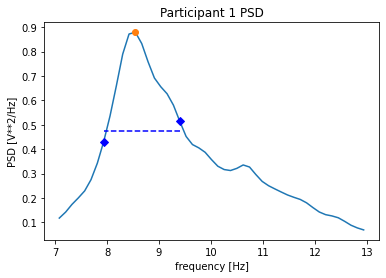

FWHM=2.8076171875


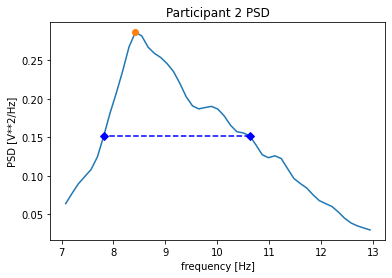

FWHM=2.44140625


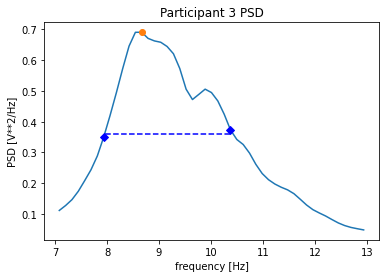

FWHM=2.197265625


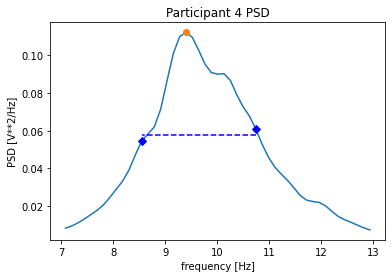

FWHM=3.2958984375


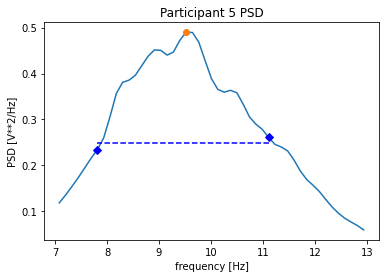

FWHM=3.5400390625


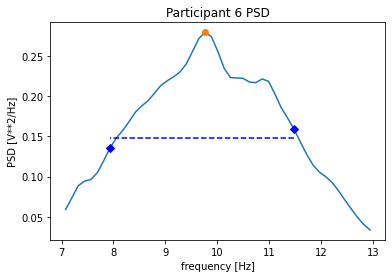

FWHM=3.173828125


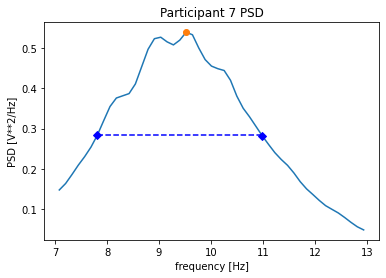

FWHM=3.41796875


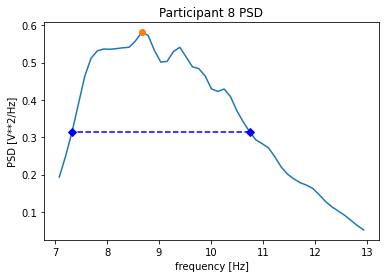

FWHM=3.5400390625


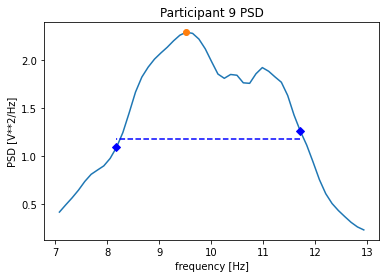

FWHM=3.173828125


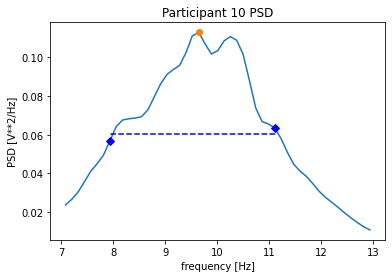

FWHM=3.5400390625


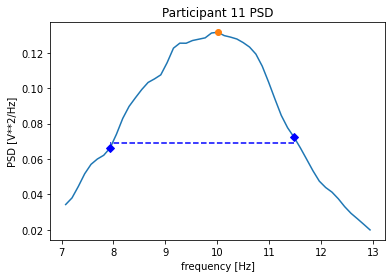

FWHM=3.7841796875


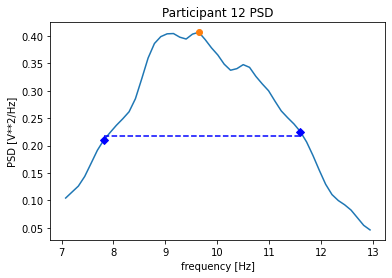

FWHM=3.0517578125


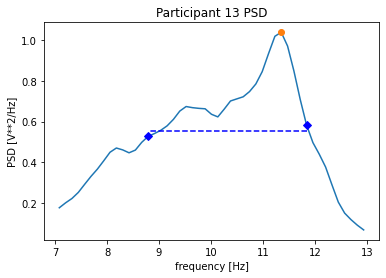

FWHM=2.3193359375


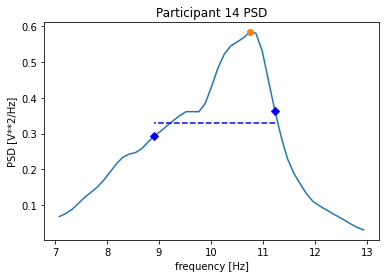

FWHM=1.8310546875


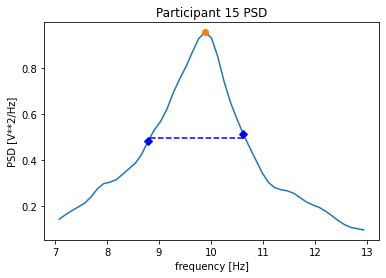

FWHM=3.5400390625


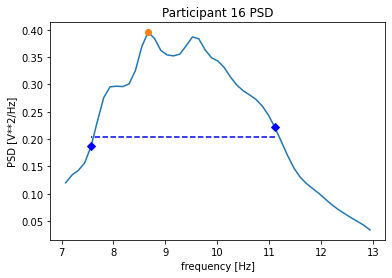

FWHM=3.2958984375


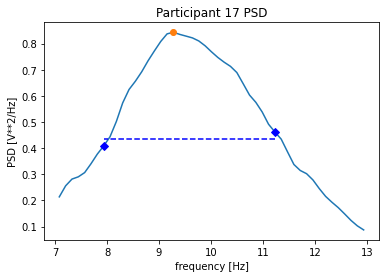

FWHM=3.0517578125


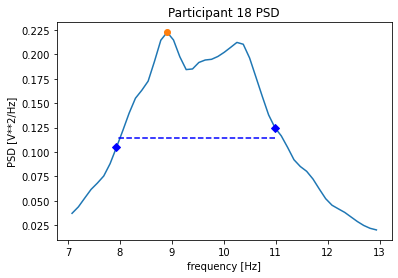

FWHM=2.8076171875


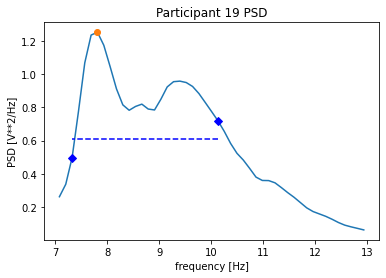

FWHM=1.8310546875


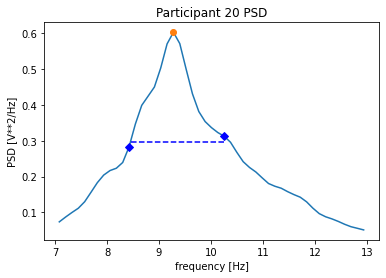

FWHM=3.0517578125


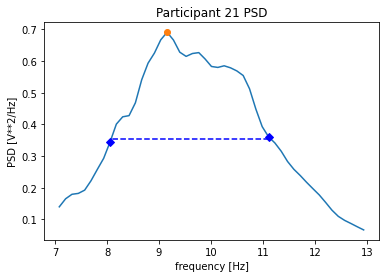

FWHM=2.8076171875


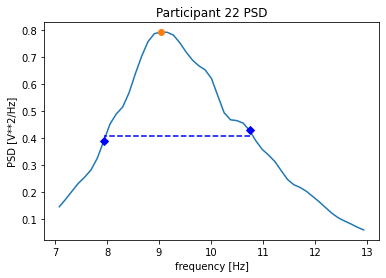

14
FWHM=0.6103515625


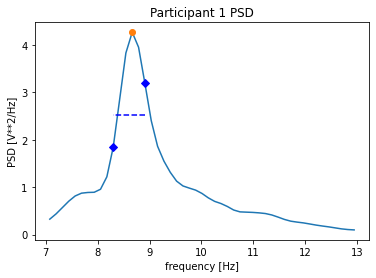

FWHM=2.44140625


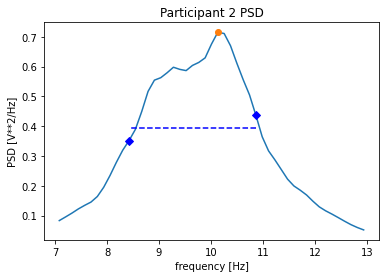

FWHM=1.953125


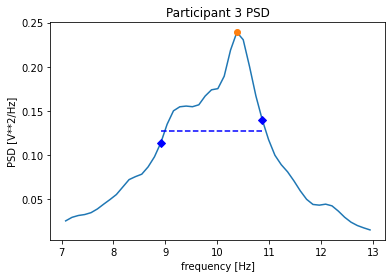

FWHM=3.2958984375


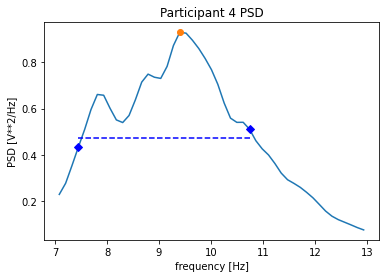

FWHM=1.953125


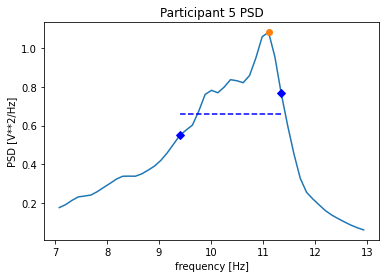

FWHM=0.732421875


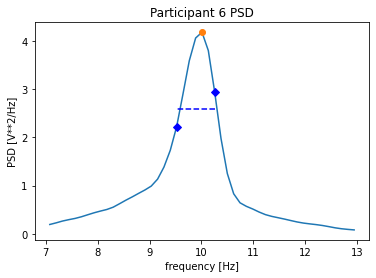

FWHM=3.41796875


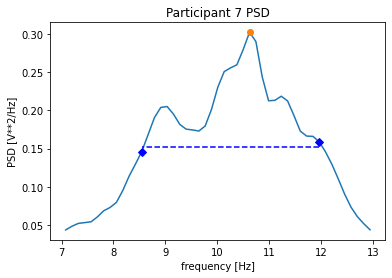

FWHM=1.5869140625


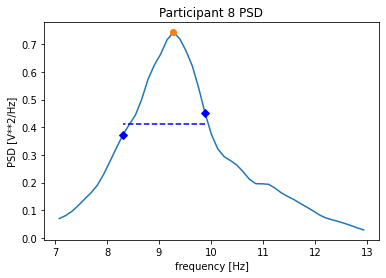

FWHM=1.220703125


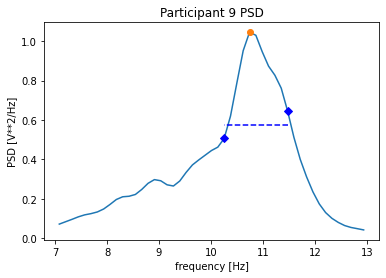

FWHM=3.41796875


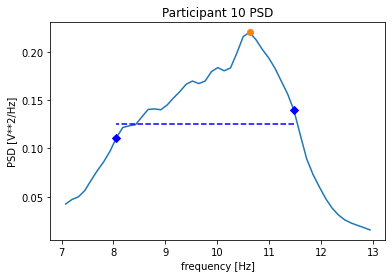

FWHM=2.3193359375


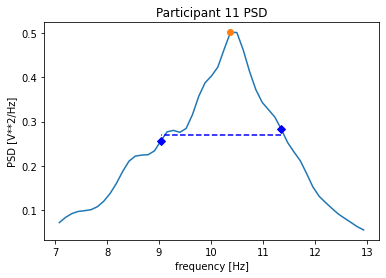

FWHM=1.220703125


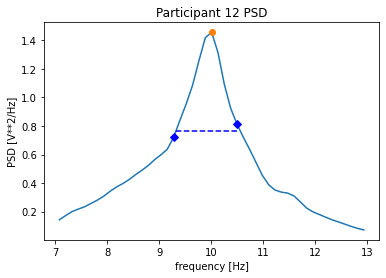

FWHM=1.8310546875


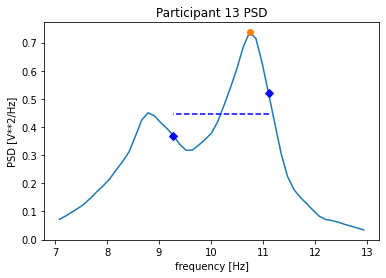

FWHM=3.0517578125


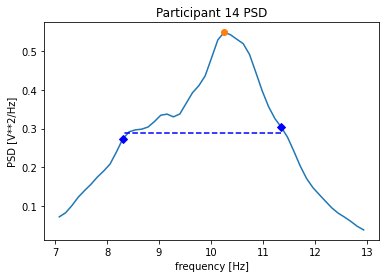

In [7]:
fwhms_pms=find_fwhm('/Users/naomimiller/Documents/thesis_jhub/all_participants/PMS_unsegmented',iir=0)
fwhms_control=find_fwhm('/Users/naomimiller/Documents/thesis_jhub/all_participants/control_unsegmented',iir=0)



In [48]:
print(kruskal(fwhms_pms,fwhms_control))
print(np.mean(fwhms_pms))
print(np.mean(fwhms_control))
print(np.median(fwhms_pms))
print(np.median(fwhms_control))


KruskalResult(statistic=2.647837599293899, pvalue=0.10369085963750431)
2.591219815340909
2.0926339285714284
2.74658203125
2.0751953125


Text(0.5, 1.0, 'Individual Full Width Half Maximum Values by Group- IIR bandpass filter')

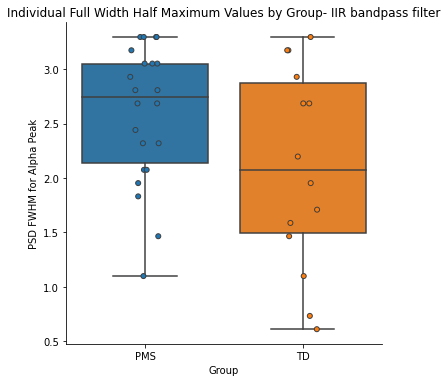

In [7]:
import seaborn as sns
# pms=pd.dataframe(fwhms_pms)
# control=pd.dataframe(fwhms_control)

df = pd.DataFrame()
df['PMS'] = pd.Series(fwhms_pms)
df['TD'] = pd.Series(fwhms_control)

fig=sns.catplot(data=df,linewidth=1)
sns.boxplot(data=df, whis=np.inf)
fig.set_axis_labels("Group", "PSD FWHM for Alpha Peak")
plt.title('Individual Full Width Half Maximum Values by Group- IIR bandpass filter')

In [17]:
print(kruskal(fwhms_pms,fwhms_control))
print(np.mean(fwhms_pms))
print(np.mean(fwhms_control))
print(np.median(fwhms_pms))
print(np.median(fwhms_control))


KruskalResult(statistic=2.6488662852299107, pvalue=0.10362377505643908)
2.585671164772727
2.0926339285714284
2.74658203125
2.0751953125


22
FWHM=1.46484375


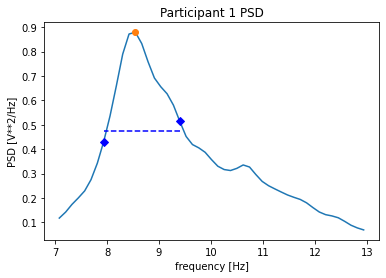

FWHM=2.8076171875


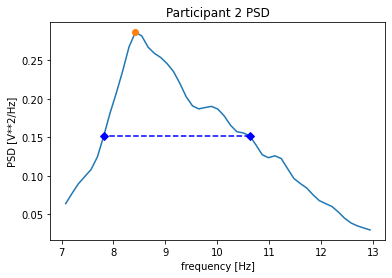

FWHM=2.44140625


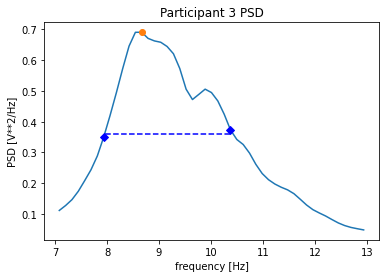

FWHM=2.197265625


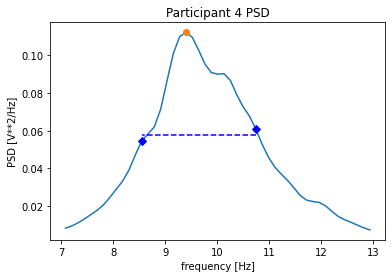

FWHM=3.2958984375


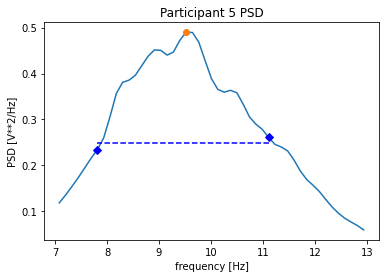

FWHM=3.5400390625


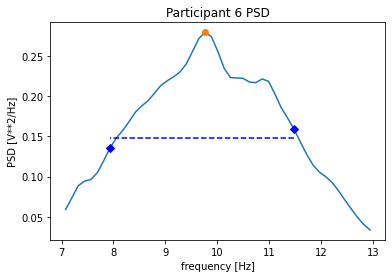

FWHM=3.173828125


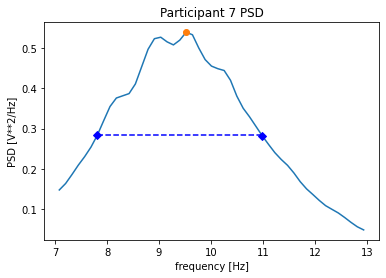

FWHM=3.41796875


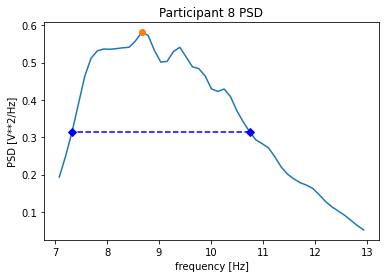

FWHM=3.5400390625


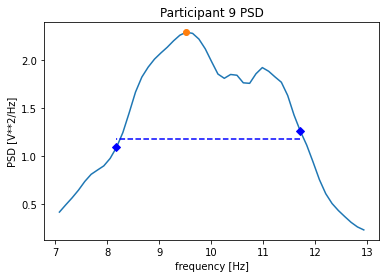

FWHM=3.173828125


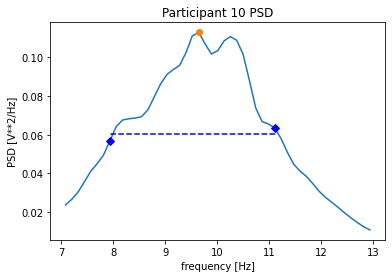

FWHM=3.5400390625


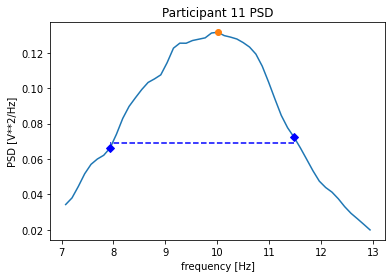

FWHM=3.7841796875


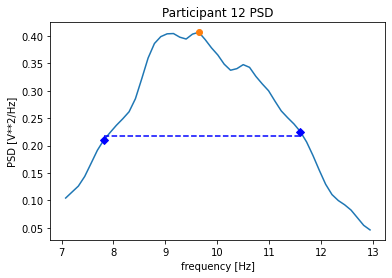

FWHM=3.0517578125


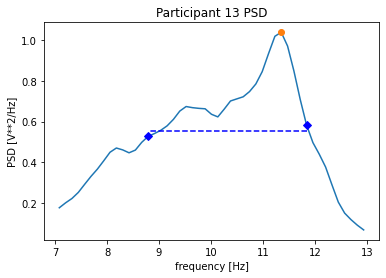

FWHM=2.3193359375


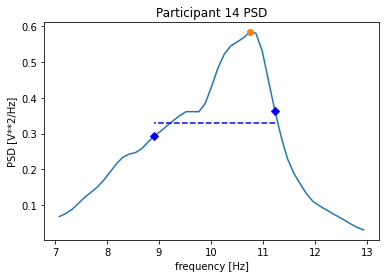

FWHM=1.8310546875


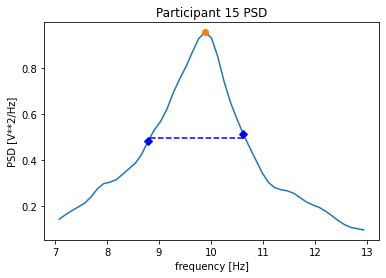

FWHM=3.5400390625


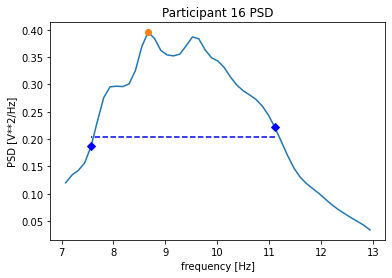

FWHM=3.2958984375


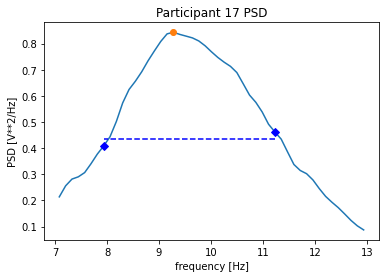

FWHM=3.0517578125


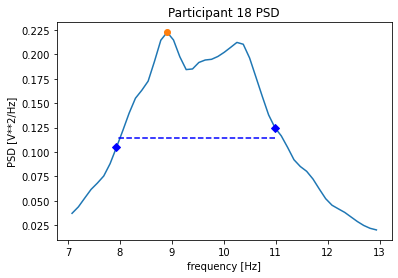

FWHM=2.8076171875


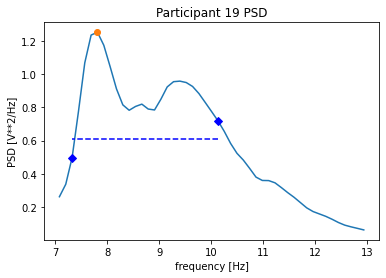

FWHM=1.8310546875


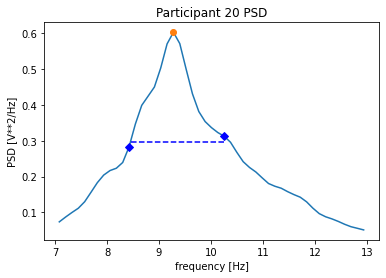

FWHM=3.0517578125


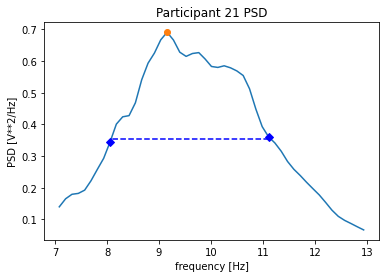

FWHM=2.8076171875


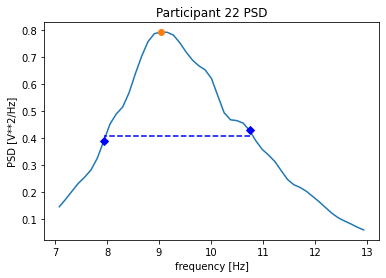

14
FWHM=0.6103515625


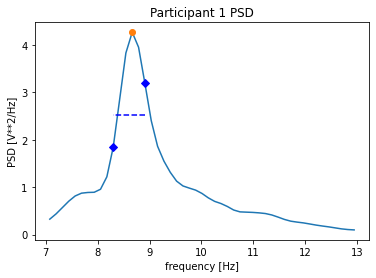

FWHM=2.44140625


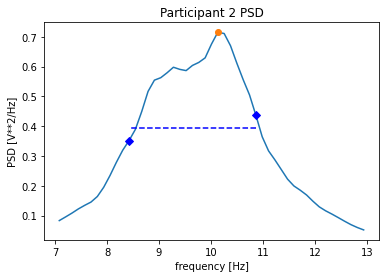

FWHM=1.953125


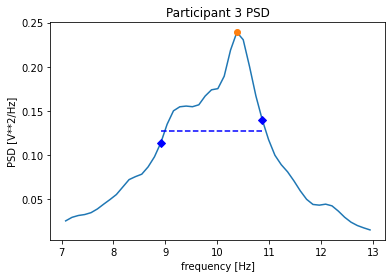

FWHM=3.2958984375


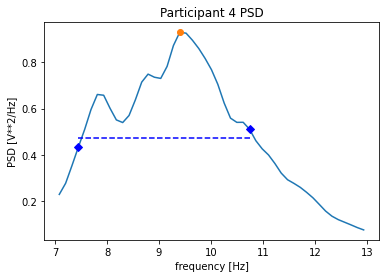

FWHM=1.953125


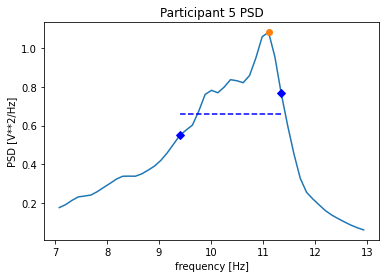

FWHM=0.732421875


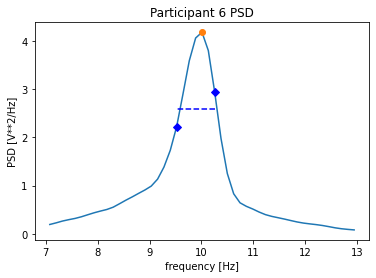

FWHM=3.41796875


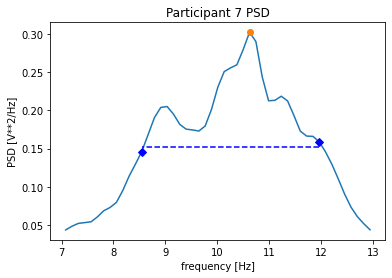

FWHM=1.5869140625


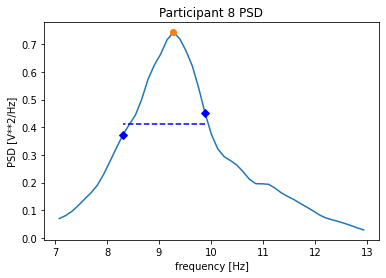

FWHM=1.220703125


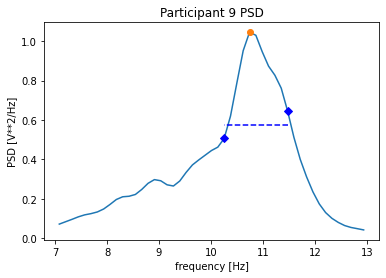

FWHM=3.41796875


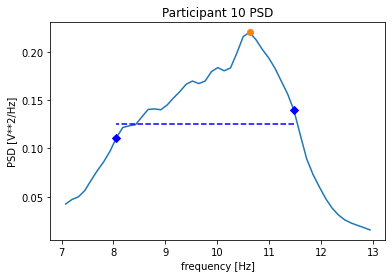

FWHM=2.3193359375


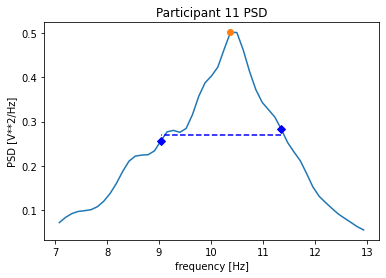

FWHM=1.220703125


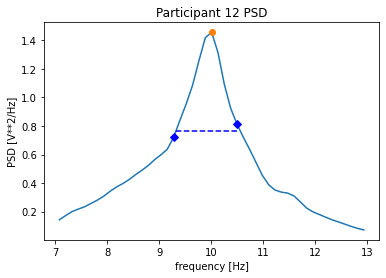

FWHM=1.8310546875


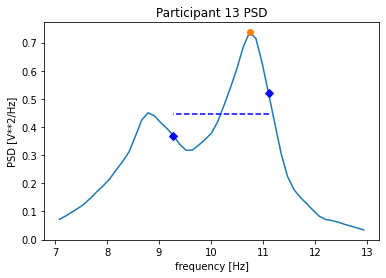

FWHM=3.0517578125


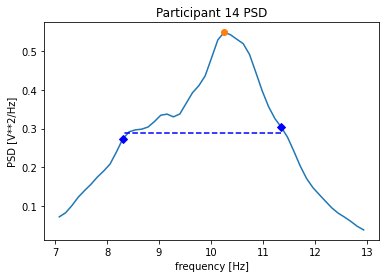

In [8]:
fwhms_pms_fir=find_fwhm('/Users/naomimiller/Documents/thesis_jhub/all_participants/PMS_unsegmented',iir=0)
fwhms_control_fir=find_fwhm('/Users/naomimiller/Documents/thesis_jhub/all_participants/control_unsegmented',iir=0)


Text(0.5, 1.0, 'Individual Full Width Half Maximum Values by Group-FIR bandpass filter')

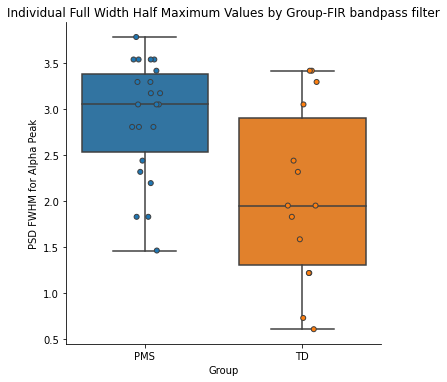

In [14]:

df = pd.DataFrame()
df['PMS'] = pd.Series(fwhms_pms_fir)
df['TD'] = pd.Series(fwhms_control_fir)

fig=sns.catplot(data=df,linewidth=1)
sns.boxplot(data=df, whis=np.inf)
fig.set_axis_labels("Group", "PSD FWHM for Alpha Peak")
plt.title('Individual Full Width Half Maximum Values by Group-FIR bandpass filter')


In [47]:
 print(kruskal(fwhms_pms_fir,fwhms_control_fir))
print(np.mean(fwhms_pms_fir))
print(np.median(fwhms_pms_fir))
print(np.mean(fwhms_control_fir))
print(np.median(fwhms_control_fir))

KruskalResult(statistic=6.195115209541391, pvalue=0.012810338487757691)
2.907492897727273
3.0517578125
2.0751953125
1.953125
